### 🔙 Volver al [Índice](./Indice_Tablas_Frecuencias.ipynb)

#  Datos cualitativos 

una empresa de productos de consumo ha realizado una encuesta entre 500 clientes para conocer sus preferencias sobre diferentes tipos de productos. Los encuestados debían elegir su tipo de producto preferido entre las siguientes categorías: A, B, C, D, E, F, G y H. Donde se quiere identificar cuál es el producto más popular entre los clientes y entender mejor sus preferencias.

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)  # Semilla diferente para variar los resultados
n = 500

# Categorías completamente aleatorias
categorias = ['Tipo A', 'Tipo B', 'Tipo C', 'Tipo D', 'Tipo E', "Tipo F", "Tipo G", "Tipo H"]

# Probabilidades aleatorias que suman 1
probs = np.random.dirichlet(np.ones(8), size=1)[0]

# Datos generados
datos = np.random.choice(categorias, size=n, p=probs)
df = pd.DataFrame(datos, columns=['Categoría'])

print("Primeras 10 observaciones:")
print(df.head(10))
print("\nProbabilidades generadas:", probs)

Primeras 10 observaciones:
  Categoría
0    Tipo G
1    Tipo E
2    Tipo E
3    Tipo G
4    Tipo F
5    Tipo A
6    Tipo E
7    Tipo G
8    Tipo C
9    Tipo C

Probabilidades generadas: [0.12530645 0.03542541 0.02704027 0.08422977 0.13358812 0.05781463
 0.41524375 0.1213516 ]


## frecuencia absoluta

In [111]:
# Calculamos frecuencias
frec_abs = df['Categoría'].value_counts().reindex(categorias)
frec_rel = (frec_abs / n).round(4)
frec_abs_acum = frec_abs.cumsum()
frec_rel_acum = frec_rel.cumsum()

tabla_frec = pd.DataFrame({
    'Frec. Absoluta': frec_abs,
    'Frec. Relativa': frec_rel,
    'Frec. Abs. Acum.': frec_abs_acum,
    'Frec. Rel. Acum.': frec_rel_acum
})

print("Tabla de Frecuencias Completa:")
tabla_frec

Tabla de Frecuencias Completa:


,Frec. Absoluta,Frec. Relativa,Frec. Abs. Acum.,Frec. Rel. Acum.
Categoría,,,,
Tipo A,64,0.128,64,0.128
Tipo B,12,0.024,76,0.152
Tipo C,11,0.022,87,0.174
Tipo D,44,0.088,131,0.262
Tipo E,79,0.158,210,0.420
Tipo F,35,0.070,245,0.490
Tipo G,195,0.390,440,0.880
Tipo H,60,0.120,500,1.000


## Histograma

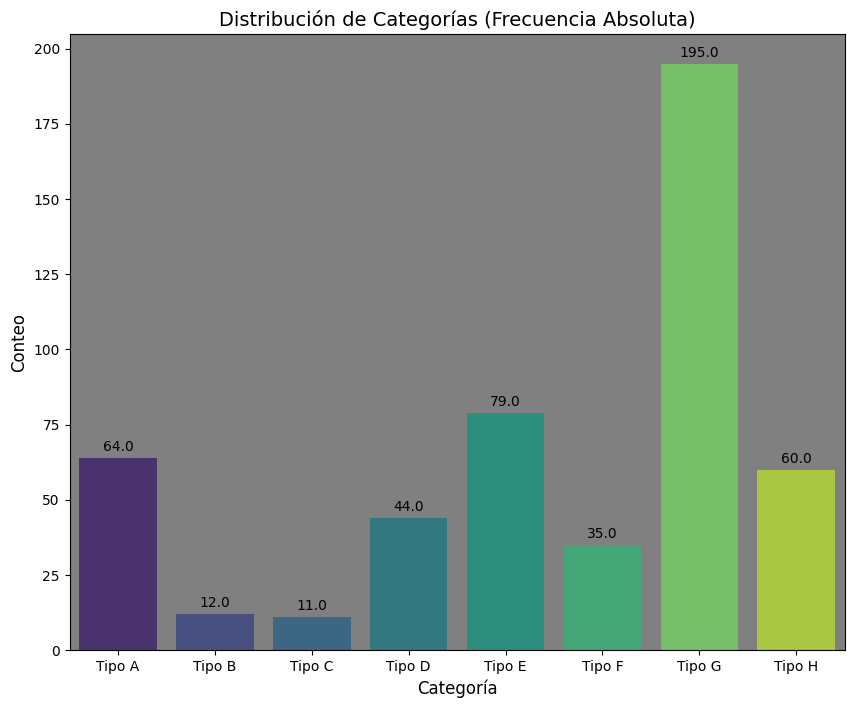

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)  # Semilla para reproducibilidad
n = 500  # Total de datos

# Categorías y frecuencias objetivo
categorias = ['Tipo A', 'Tipo B', 'Tipo C', 'Tipo D', 'Tipo E', "Tipo F", "Tipo G", "Tipo H"]
frec_abs_objetivo = np.array([64, 12, 11, 44, 79, 35, 195, 60])  # Valores exactos

# Generar y mezclar datos
datos = np.repeat(categorias, frec_abs_objetivo)
np.random.shuffle(datos)

# Crear DataFrame
df = pd.DataFrame(datos, columns=['Categoría'])

# --- Gráfico de Barras (Frecuencia Absoluta) ---
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, x='Categoría', order=categorias, palette='viridis')

# Personalización
plt.title('Distribución de Categorías (Frecuencia Absoluta)', fontsize=14)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.gca().set_facecolor('gray')

# Añadir etiquetas con los valores exactos
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points',
                fontsize=10)

plt.show()

## frecuencia relativa

### De barras

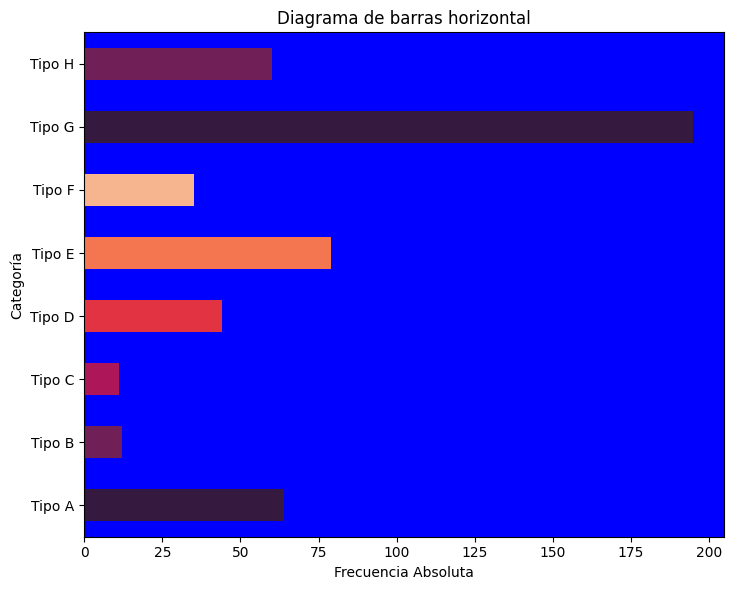

In [113]:
plt.figure(figsize=(14, 6))
# Barras horizontales
plt.subplot(1, 2, 2)
frec_abs.plot(kind='barh', color=sns.color_palette('rocket'))
plt.title('Diagrama de barras horizontal')
plt.xlabel('Frecuencia Absoluta')
plt.gca().set_facecolor('blue')
plt.tight_layout()
plt.show()

### Poligono de freuencia

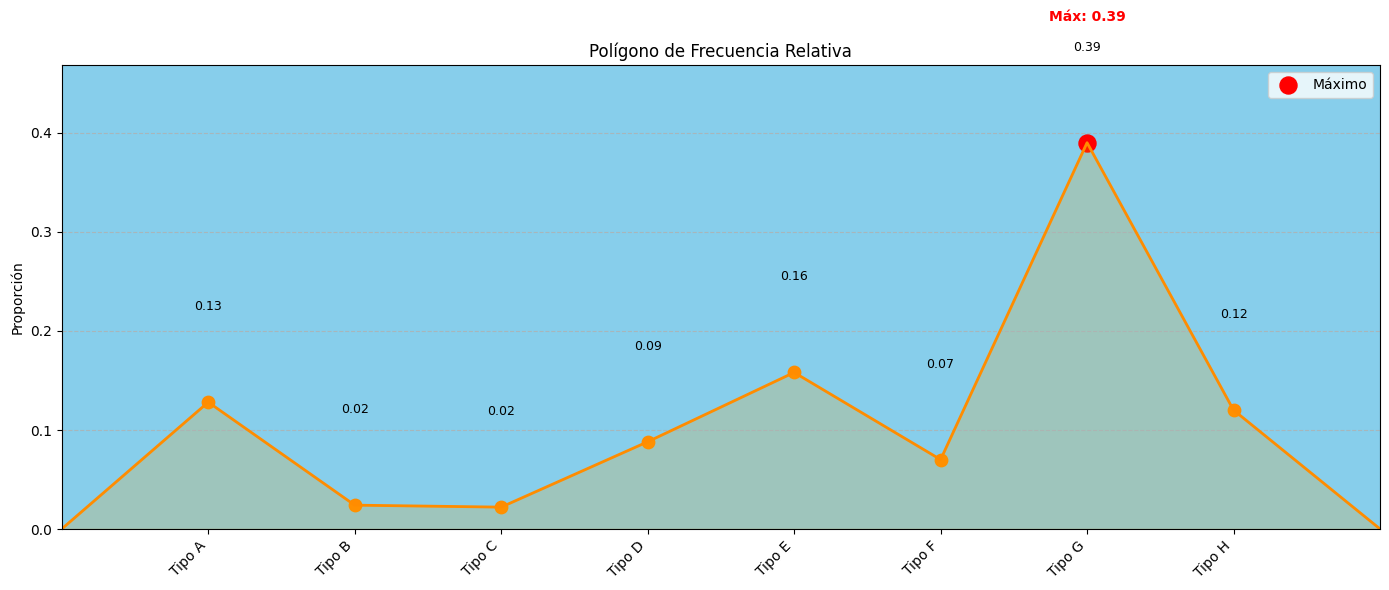

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Reajustar posiciones: empezamos desde 0 (no -0.5)
x_vals = [0] + list(range(1, len(frec_rel) + 1)) + [len(frec_rel) + 1]
y_vals = [0] + list(frec_rel.values) + [0]

# Dibujar el polígono
plt.plot(x_vals, y_vals, '-', color='darkorange', linewidth=2)
plt.scatter(x_vals[1:-1], frec_rel.values, color='darkorange', s=80)

# Resaltar el valor máximo
max_idx = frec_rel.values.argmax()
max_val = frec_rel.values[max_idx]
plt.scatter(x_vals[max_idx + 1], max_val, color='red', s=150, label='Máximo')
plt.text(x_vals[max_idx + 1], max_val + 0.12, f'Máx: {max_val:.2f}',
         ha='center', va='bottom', color='red', fontsize=10, fontweight='bold')

# Área sombreada (opcional)
plt.fill_between(x_vals, y_vals, color='orange', alpha=0.2)

# Etiquetas de categorías alineadas a los puntos verdaderos
plt.xticks(ticks=range(1, len(frec_rel) + 1), labels=frec_rel.index, rotation=45, ha='right')

# Ajustes visuales
plt.xlim(0, len(frec_rel) + 1)
plt.ylim(0, max(frec_rel.values) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.title('Polígono de Frecuencia Relativa')
plt.ylabel('Proporción')

# Etiquetas de valores
for i, val in enumerate(frec_rel.values):
    plt.text(x_vals[i + 1], val + 0.09, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

plt.gca().set_facecolor('skyblue')
plt.legend()
plt.tight_layout()
plt.show()


### Diagrama de pastel

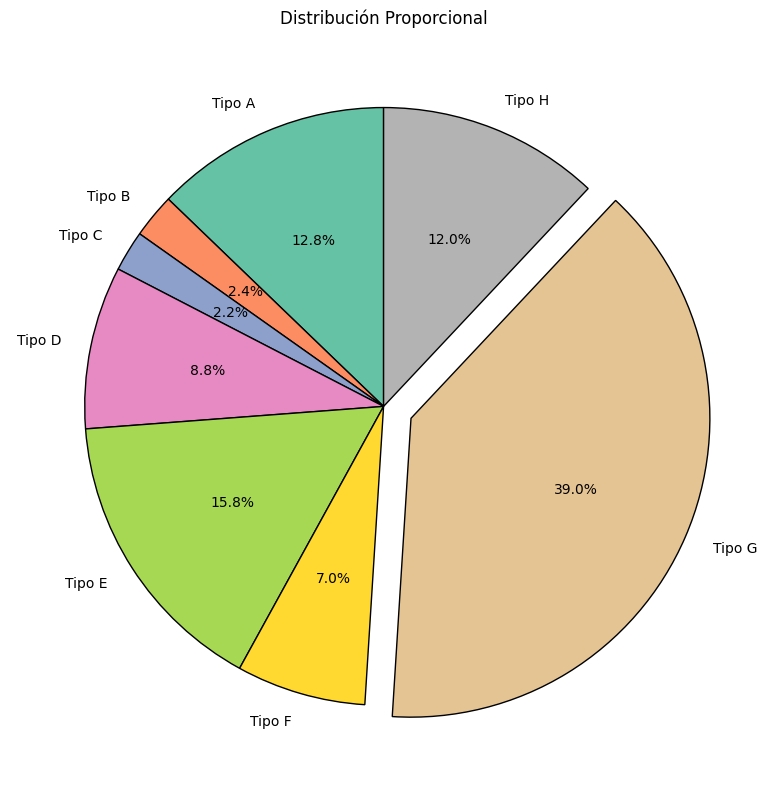

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Detectar índice del valor máximo
max_idx = frec_rel.values.argmax()

# Crear separación ("explode") para cada sector, solo el máximo se separa
explode = [0.1 if i == max_idx else 0 for i in range(len(frec_rel))]

# Crear colores (puedes personalizarlo si quieres destacar con color también)
colors = sns.color_palette('Set2')

plt.figure(figsize=(8, 8))
plt.pie(
    frec_rel,
    labels=frec_rel.index,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)


# Título
plt.title('Distribución Proporcional')

# Mostrar gráfico
plt.tight_layout()
plt.show()


## frecuencia acumulada

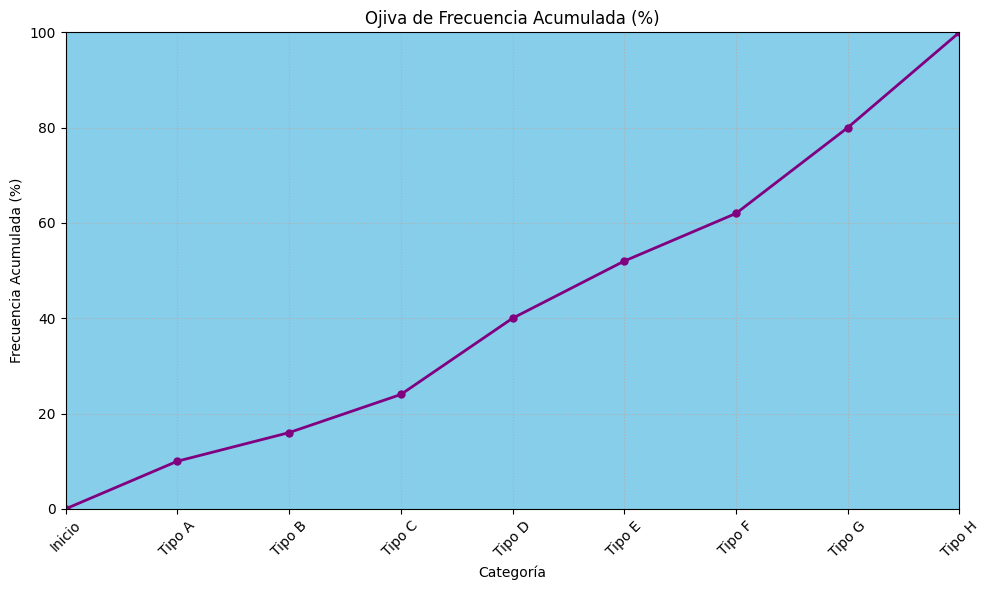

In [116]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos simulados (reemplaza con los tuyos reales)
categorias = ['Tipo A', 'Tipo B', 'Tipo C', 'Tipo D', 'Tipo E', 'Tipo F', 'Tipo G', 'Tipo H']
frec_abs = [5, 3, 4, 8, 6, 5, 9, 10]

# Calcular frecuencia acumulada y porcentaje
frec_abs_acum = pd.Series(frec_abs).cumsum()
n = sum(frec_abs)
frec_abs_acum_pct = (frec_abs_acum / n) * 100

# Punto inicial en (0, 0)
y_vals = [0] + list(frec_abs_acum_pct)
x_vals = list(range(len(y_vals)))  # x numérico: 0, 1, 2, ..., n
x_labels = ['Inicio'] + categorias

# Graficar sin sombreado
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, marker='o', color='purple', linewidth=2, markersize=5)
# plt.fill_between(x_vals, y_vals, color='purple', alpha=0.2)  # <-- ELIMINADA

plt.title('Ojiva de Frecuencia Acumulada (%)')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia Acumulada (%)')
plt.ylim(0, 100)
plt.xlim(0, len(x_labels) - 1)
plt.xticks(x_vals, x_labels, rotation=45)
plt.grid(True, linestyle=':')
plt.gca().set_facecolor('skyblue')


plt.tight_layout()
plt.show()
